In [39]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [14]:
filename = '../csv_detection_info/20_0.csv'
filename_clean = '../csv_detection_info_clean/20_0.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/20/0'

In [7]:
detection_df = pd.read_csv(filename)

In [22]:
detection_df

,base_path,filename,ax0_min,ax0_max,ax1_min,ax1_max,confidence,year,diagnosis,diagnosis_raw
0,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.17743.20200127.103203.0.dcm,556,705,626,775,0.999581,20,0,0
1,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.31635.20200909.182350.0.dcm,711,870,1389,1548,0.989332,20,0,0
2,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.31635.20200923.120952.0.dcm,980,1139,1175,1335,0.999967,20,0,0
3,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.32121.20200430.152303.0.dcm,1579,1805,1143,1371,0.990943,20,0,0
4,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.32121.20201217.152659.0.dcm,1208,1402,908,1101,0.999899,20,0,0
5,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.276.0.95.32121.20201217.153236.0.dcm,1090,1284,1227,1421,0.999986,20,0,0
6,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.392.200036.9125.4.0.2132676347.50352128.22...,671,800,525,655,0.999947,20,0,0
7,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.392.200036.9125.9.0.253654714.1477141504.1...,1068,1306,925,1163,0.999484,20,0,0
8,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.392.200036.9125.9.0.455170584.150995736.64...,323,480,522,679,1.000000,20,0,0
9,//nmbu.no/LargeFile/Project/CubiAI/sortering/d...,1.2.840.114387.103119190.12463.18611.36617.163...,416,565,887,1036,1.000000,20,0,0


### [Optional] Sort by confidence (filter out bad prediction)

In [10]:
# detection_df = detection_df[detection_df.confidence > 0.5]

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [13]:
# plot every 9 of them

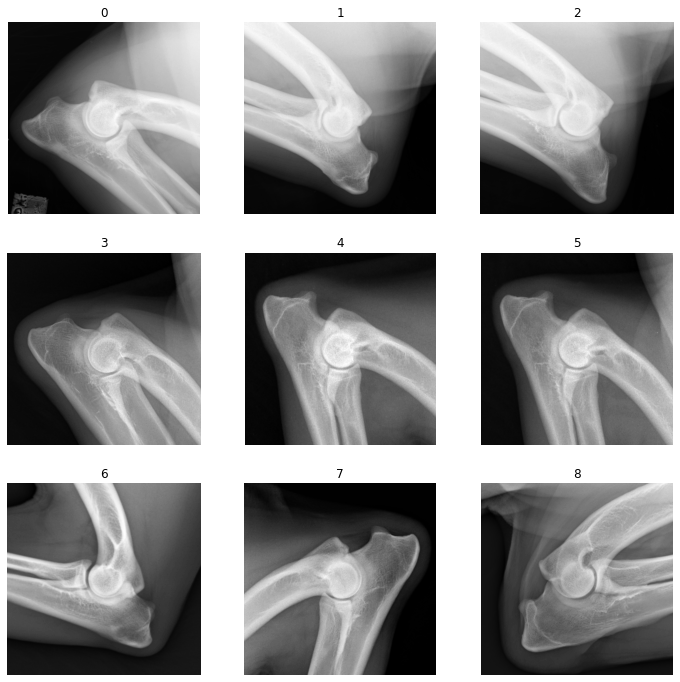

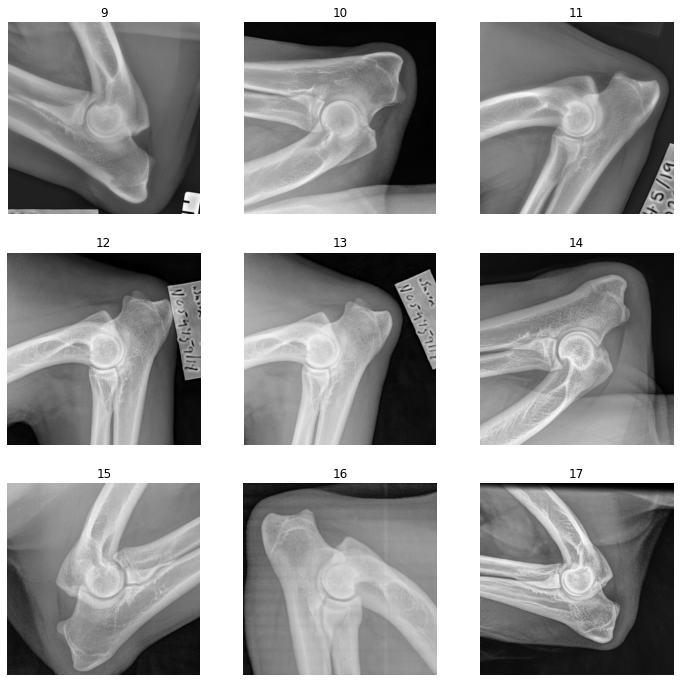

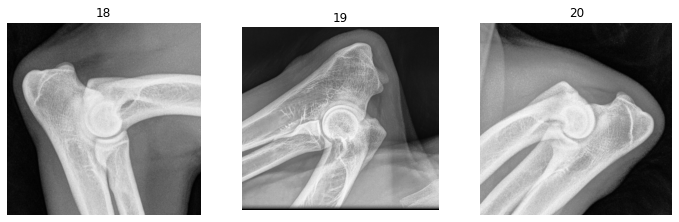

In [40]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove data with problems

In [44]:
# None in this case so we can save the csv to the clean folder
detection_df.to_csv(filename_clean, index=False)